# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [3]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [6]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
# from sagemaker.tuner import (
#     IntegerParameter,
#     CategoricalParameter,
#     ContinuousParameter,
#     HyperparameterTuner,
# )

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [8]:
#TODO: Fetch and upload the data to AWS S3
# !mkdir -p dogImages



# # Command to download and unzip data
# !wget -c -P dogImages https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !unzip dogImages/dogImages.zip 

# sagemaker_session=sagemaker.Session()
# bucket = sagemaker_session.default_bucket()
# prefix = "nd009t-c3-project/dogImages"
# inputs = sagemaker_session.upload_data(path="dogImages/", bucket=bucket, key_prefix=prefix)
role = sagemaker.get_execution_role()

In [9]:
inputs = 's3://sagemaker-us-east-1-659001530016/nd009t-c3-project/dogImages'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [11]:
hyperparameter_ranges = {
    "lr": sagemaker.tuner.ContinuousParameter(1e-4, 1e-1),
    "weight-decay": sagemaker.tuner.ContinuousParameter(1e-3, 1e-1),
    "eps": sagemaker.tuner.ContinuousParameter(1e-9, 1e-7),
    "batch-size": sagemaker.tuner.CategoricalParameter([32, 64]),
#     "test-batch-size": sagemaker.tuner.CategoricalParameter([64]),
}
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]
#TODO: Declare your HP ranges, metrics etc.

In [15]:
from sagemaker.pytorch import PyTorch
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge"
)
# TODO: Your estimator here

tuner = sagemaker.tuner.HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
    early_stopping_type="Auto",
)
# TODO: Your HP tuner here

In [17]:
!pip install torchvision==0.5.0 --no-cache-dir

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 4.0 MB 20.2 MB/s            
     |████████████████████████████████| 753.4 MB 55.0 MB/s             /s eta 0:00:04


In [16]:
# TODO: Fit your HP Tuner
tuner.fit( {"training": inputs}, wait=True ) # TODO: Remember to include your data channels

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................!


In [17]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-01-20 01:35:49 Starting - Preparing the instances for training
2022-01-20 01:35:49 Downloading - Downloading input data
2022-01-20 01:35:49 Training - Training image download completed. Training in progress.
2022-01-20 01:35:49 Uploading - Uploading generated training model
2022-01-20 01:35:49 Completed - Training job completed


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"64"',
 'eps': '8.953219621731109e-08',
 'lr': '0.0022684910380116703',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-01-20-00-35-28-921"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-659001530016/pytorch-training-2022-01-20-00-35-28-921/source/sourcedir.tar.gz"',
 'weight-decay': '0.015282046320745372'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [50]:
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerConfig, 
    FrameworkProfile,
    ProfilerRule,
    CollectionConfig,
)



rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

profiler_config = ProfilerConfig(system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1))

collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0",
                                     parameters={"include_regex": "CrossEntropyLoss_output_0",
                                                 "train.save_interval": "10",
                                                 "eval.save_interval": "1"})]

debugger_config=DebuggerHookConfig(collection_configs=collection_configs)

hyperparameters={'batch-size': int(best_estimator.hyperparameters()['batch-size'].replace('"', "")),
                      'eps': best_estimator.hyperparameters()['eps'],
                      'lr': best_estimator.hyperparameters()['lr'],
                      'weight-decay': best_estimator.hyperparameters()['weight-decay'],}
# TODO: Set up debugging and profiling rules and hooks

In [53]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch
estimator =  PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-mnist-pytorch",
    role=role,
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    ## Debugger and profiler parameters
    profiler_config=profiler_config,
    rules=rules,
    debugger_hook_config=hook_config,
)

# TODO: Your estimator here

In [55]:

estimator.fit( {"training": inputs}, wait=True)
# TODO: Your estimator here

2022-01-20 04:50:33 Starting - Starting the training job...
2022-01-20 04:51:00 Starting - Launching requested ML instancesVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2022-01-20 04:52:01 Starting - Preparing the instances for training......
2022-01-20 04:53:01 Downloading - Downloading input data.........
2022-01-20 04:54:27 Training - Downloading the training image.....................
2022-01-20 04:58:06 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-01-20 04:58:06,764 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-01-20 04:58:06,784 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-01-20 04:58:06,793 sagemaker_pytorch_containe

In [56]:
training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print()
trial = create_trial(estimator.latest_job_debugger_artifacts_path())
print(trial.tensor_names())
print()
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

Training jobname: smdebugger-mnist-pytorch-2022-01-20-04-50-32-567

[2022-01-20 05:10:03.563 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/debug-output
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'gradient/ResNet_fc.2.bias', 'gradient/ResNet_fc.2.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu_input_2', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer2.1.relu_input_2', 'layer2.2.relu_input_0', 'layer2.2.relu_input_1', 'layer2.2.relu_input_2', 'layer2.3.relu_input_0', 'layer2.3.relu_input_1', 'layer2.3.relu_input_2', 'layer3.0.relu_

[array(4.908061, dtype=float32), array(1.4702514, dtype=float32), array(1.1776166, dtype=float32), array(1.2036514, dtype=float32), array(0.95079345, dtype=float32), array(1.0514112, dtype=float32)]
loaded TRAIN data
[array(0.9323293, dtype=float32), array(1.1978886, dtype=float32), array(0.76165664, dtype=float32), array(0.89314675, dtype=float32), array(0.932934, dtype=float32), array(0.49637586, dtype=float32), array(0.6419619, dtype=float32), array(0.57447654, dtype=float32), array(0.8808452, dtype=float32)]
loaded EVAL data
completed TRAIN plot
completed EVAL plot


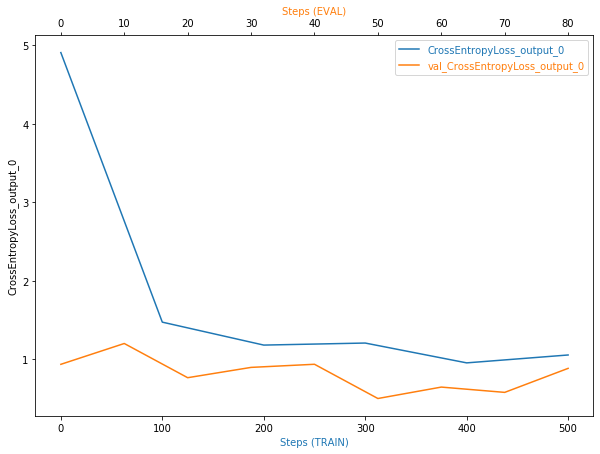

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    print (vals)
    return steps, vals

def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
    
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

**Well, according to debugger some issues were detected during training:**

PoorWeightInitialization: IssuesFound
LowGPUUtilization: IssuesFound

I would set up an automation that stops training job because poorweightinitialization is an indication that the neural network cannot learn properly. LowGpuUtilization issue would be to use a more powerful Instance.

In [58]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

# TODO: Display the profiler output

2022-01-20 05:08:37     415930 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-01-20 05:08:36     270563 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-01-20 05:08:31        192 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-01-20 05:08:31      31826 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-01-20 05:08:31       2242 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-01-20 05:08:31        327 smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-01-20 05:08:31       6704 smdebugger-mnist-pytorch-2022-01-20-04-50-32-56

In [59]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json to ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json
download: s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download

In [60]:


# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [61]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [62]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.g4dn.xlarge") # TODO: Add your deployment configuration like instance type and number of instances

----------!

In [67]:
from sagemaker.pytorch import PyTorchModel
model_data = estimator.model_data
print(model_data)
model = PyTorchModel(model_data=model_data, role=role, entry_point="model.py", py_version="py36", framework_version="1.8") 

s3://sagemaker-us-east-1-659001530016/smdebugger-mnist-pytorch-2022-01-20-04-50-32-567/output/model.tar.gz


In [68]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

------!

In [69]:
with open("golden-retriever.jpg", 'rb') as f:
    img = f.read()

In [71]:
import json
runtime = boto3.client('runtime.sagemaker')
resp = runtime.invoke_endpoint(EndpointName = predictor.endpoint_name,
                               ContentType = 'image/png',
                               Body = img)  

pred = json.loads(resp['Body'].read().decode())

In [72]:
print(pred)

[[-14.810246467590332, -4.138731002807617, -2.249629497528076, -8.173216819763184, -9.54761028289795, -15.67464828491211, -3.664421796798706, -9.376264572143555, -3.478198289871216, -3.9798388481140137, -6.712547779083252, -4.59294319152832, -11.341716766357422, -11.7283935546875, -7.561404705047607, -3.084338426589966, -11.37326717376709, -8.543302536010742, -8.642248153686523, -10.039814949035645, -12.853440284729004, -11.049263954162598, -7.196277618408203, -16.50899314880371, -9.945898056030273, -11.244203567504883, -7.073311805725098, -11.796050071716309, -10.724793434143066, -7.032136917114258, -2.642758846282959, -14.752423286437988, -15.820694923400879, -10.39834976196289, -3.0506768226623535, -8.368620872497559, -1.040808916091919, -5.3352155685424805, -8.685728073120117, -9.666471481323242, -11.902975082397461, -12.130589485168457, -3.7697858810424805, -11.66063117980957, -6.1587629318237305, -4.999539375305176, -0.16445067524909973, -6.339292049407959, -10.3406982421875, -4.

In [74]:
import numpy as np
np.argmax(pred[0])

75

In [75]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()